<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [ ]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [ ]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [ ]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [2]:
# Install the required libraries if not already installed
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

# Import the libraries needed for data manipulation, visualization, and statistical analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [6]:
# Import required libraries for reading data from a URL
from js import fetch
import io

# Define the URL for the dataset
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

# Fetch the data from the URL
resp = await fetch(URL)

# Convert the fetched data into a readable format
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

# Read the CSV file into a pandas DataFrame
boston_df = pd.read_csv(boston_url)

# Display the first few rows of the dataset to confirm it loaded properly
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Boxplot for the "Median value of owner-occupied homes" (MEDV)

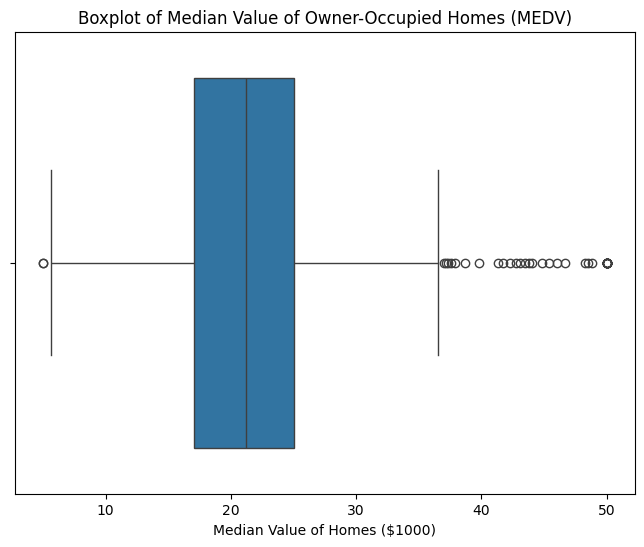

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value of Homes ($1000)')
plt.show()


# Bar Plot for the Charles River Variable (CHAS)

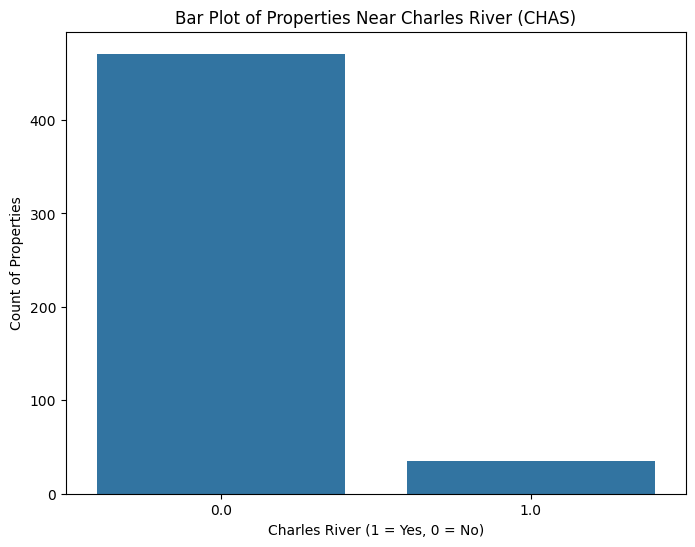

In [8]:
import matplotlib.pyplot as pd 
# Bar plot for the 'Charles River' variable (CHAS)
plt.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot of Properties Near Charles River (CHAS)')
plt.xlabel('Charles River (1 = Yes, 0 = No)')
plt.ylabel('Count of Properties')
plt.show()


# Boxplot for MEDV vs AGE

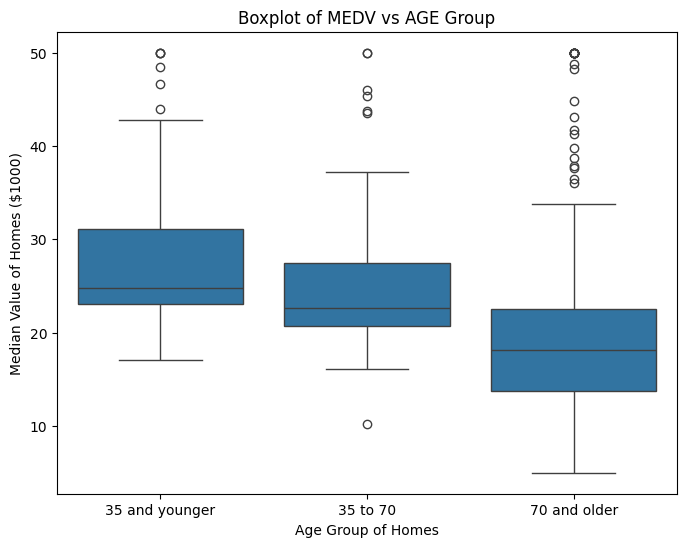

In [11]:
# Import pandas as pd and matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

# Discretize the AGE variable into 3 groups
bins = [0, 35, 70, float('inf')]
labels = ['35 and younger', '35 to 70', '70 and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Boxplot for MEDV vs AGE_group
plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs AGE Group')
plt.xlabel('Age Group of Homes')
plt.ylabel('Median Value of Homes ($1000)')
plt.show()


# Scatter Plot for NOX vs. INDUS 

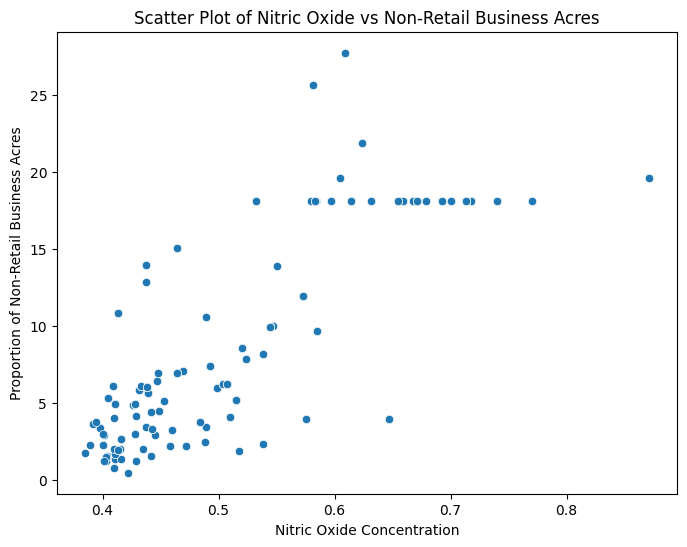

In [12]:
import matplotlib.pyplot as pd 
# Scatter plot for NOX vs INDUS
plt.figure(figsize=(8, 6))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title('Scatter Plot of Nitric Oxide vs Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentration')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()


# Histogram for Pupil-Teacher Ratio (PTRATIO)

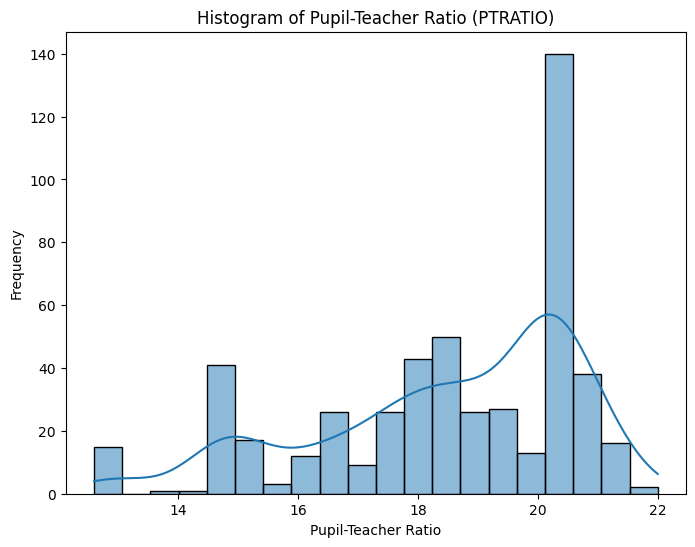

In [13]:
import matplotlib.pyplot as pd 
# Histogram for PTRATIO (Pupil-Teacher Ratio)
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], kde=True, bins=20)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


# Perform Statistical Tests

# T-test for MEDV and CHAS (Charles River)

In [14]:
from scipy import stats

# Group data based on the Charles River proximity
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform T-test for independent samples
t_stat, p_value = stats.ttest_ind(group1, group2)

# Display results
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05


# ANOVA for MEDV vs. AGE Group

In [15]:
# Perform ANOVA for the three AGE groups
f_stat, p_value = stats.f_oneway(
    boston_df[boston_df['AGE_group'] == '35 and younger']['MEDV'],
    boston_df[boston_df['AGE_group'] == '35 to 70']['MEDV'],
    boston_df[boston_df['AGE_group'] == '70 and older']['MEDV']
)

# Display results
print(f'F-statistic: {f_stat}, P-value: {p_value}')


F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15


# Pearson Correlation for NOX vs. INDUS

In [16]:
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'Pearson correlation: {correlation}, P-value: {p_value}')


Pearson correlation: 0.7636514469209192, P-value: 7.913361061210442e-98


In [ ]:
# 

In [17]:
import statsmodels.api as sm

# Define the independent variable (DIS) and dependent variable (MEDV)
X = boston_df['DIS']
y = boston_df['MEDV']

# Add constant to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        16:02:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0